In [25]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [27]:
%reload_ext autoreload
%autoreload 2

from src.constants import csv_file, directory, INPUT_SHAPE, YEAR, ext

from src.utils import Dataset_Diabetic, data_class
from src.utils import (
    plot_samples,
    get_dataloader,
    plot_confusion_matrix,
    calculate_confusion_matrix,
)

from src.model import Model_Retinopathy

from src.constants import EPOCHS, BATCH_SIZE, LEARNING_RATE, UPDATES

In [28]:
# MODEL STUFF
model = Model_Retinopathy(torch.optim.Adam).to(device)

In [29]:
# DATA STUFF
df = pd.read_csv(csv_file)
train_df = df.sample(frac=0.95)
val_df = df.drop(train_df.index).reset_index(drop=True)
train_df = train_df.reset_index(drop=True)

train_data, train_loader = get_dataloader(train_df, ext, directory, BATCH_SIZE, False)
val_data, val_loader = get_dataloader(val_df, ext, directory, BATCH_SIZE, False)

update_every = len(train_loader) // UPDATES

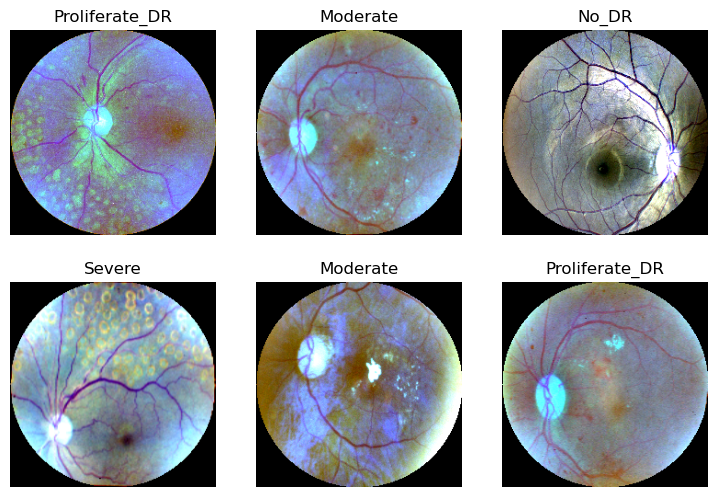

In [30]:
plot_samples(train_data, 2, 3)

In [ ]:
model.train_loop(train_loader, val_loader, epochs=EPOCHS)

Epoch: 0
Batch #0: Loss:  4.04724 Accuracy:  0.0625
Batch #27: Loss:  3.12061 Accuracy:  0.0000
Batch #54: Loss:  2.42985 Accuracy:  0.0938
Batch #81: Loss:  1.95525 Accuracy:  0.1562
Batch #108: Loss:  1.58723 Accuracy:  0.2174
VALIDATION:  {'accuracy': 0.3442622950819672, 'loss': 1.5573154489199321}
Epoch: 1
Batch #0: Loss:  1.45020 Accuracy:  0.3125
Batch #27: Loss:  1.40516 Accuracy:  0.4375
Batch #54: Loss:  1.44016 Accuracy:  0.4062
Batch #81: Loss:  1.45823 Accuracy:  0.3438
Batch #108: Loss:  1.52616 Accuracy:  0.3478
VALIDATION:  {'accuracy': 0.46994535519125685, 'loss': 1.3071062564849854}
Epoch: 2
Batch #0: Loss:  1.67073 Accuracy:  0.3438
Batch #27: Loss:  1.46772 Accuracy:  0.5000
Batch #54: Loss:  1.22760 Accuracy:  0.5000
Batch #81: Loss:  1.44360 Accuracy:  0.4688
Batch #108: Loss:  1.19256 Accuracy:  0.5217
VALIDATION:  {'accuracy': 0.48633879781420764, 'loss': 1.2820032437642415}
Epoch: 3
Batch #0: Loss:  1.19315 Accuracy:  0.5625
Batch #27: Loss:  1.31230 Accuracy:  

In [ ]:
model.unfreeze(0.7)
model.train_loop(train_loader, val_loader, epochs=5)

Epoch: 25
Batch #0: Loss:  0.91893 Accuracy:  0.7500
Batch #27: Loss:  0.75835 Accuracy:  0.7812
Batch #54: Loss:  0.58602 Accuracy:  0.8438
Batch #81: Loss:  0.49475 Accuracy:  0.8438
Batch #108: Loss:  0.60232 Accuracy:  0.8696
VALIDATION:  {'accuracy': 0.7650273224043715, 'loss': 0.6254359980424246}
Epoch: 26
Batch #0: Loss:  0.53250 Accuracy:  0.7500
Batch #27: Loss:  0.72798 Accuracy:  0.7188
Batch #54: Loss:  0.74044 Accuracy:  0.7500
Batch #81: Loss:  0.98810 Accuracy:  0.5938
Batch #108: Loss:  0.44879 Accuracy:  0.8261
VALIDATION:  {'accuracy': 0.7704918032786885, 'loss': 0.5902522852023443}
Epoch: 27
Batch #0: Loss:  0.59744 Accuracy:  0.7812
Batch #27: Loss:  0.64647 Accuracy:  0.7188
Batch #54: Loss:  0.42344 Accuracy:  0.9062
Batch #81: Loss:  0.38713 Accuracy:  0.8750
Batch #108: Loss:  0.86625 Accuracy:  0.6087
VALIDATION:  {'accuracy': 0.819672131147541, 'loss': 0.5619351069132487}
Epoch: 28
Batch #0: Loss:  0.58806 Accuracy:  0.7812
Batch #27: Loss:  0.13348 Accuracy: 

KeyboardInterrupt: 

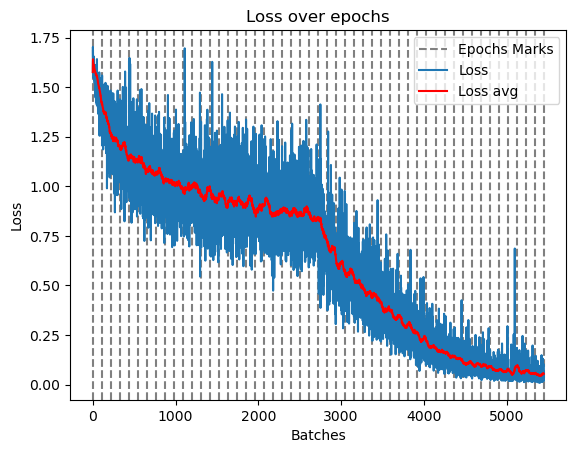

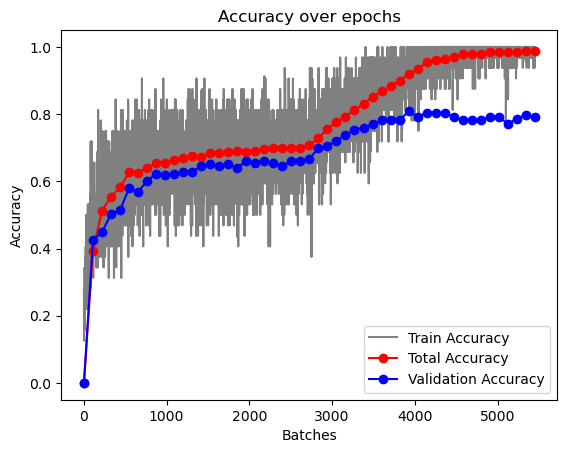

In [ ]:
ax = model.plot_loss()
plt.show()
ax = model.plot_accuracy()
plt.show()

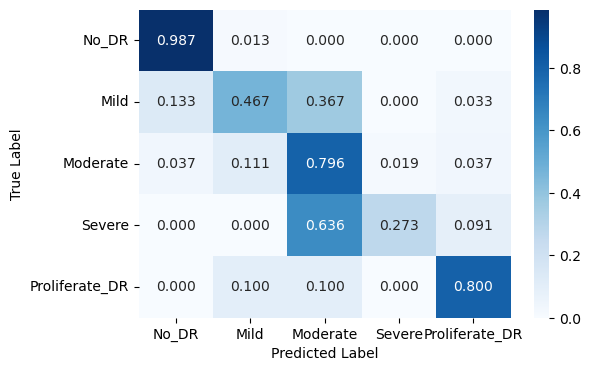

In [ ]:
confusion_matrix = calculate_confusion_matrix(model, val_loader)
plot_confusion_matrix(confusion_matrix, data_class.values())

In [ ]:
extra_year = 2015 if YEAR == 2019 else 2019
ext = "png" if extra_year == 2019 else "jpeg"
extra_dir = f"Data/Resized/preprocessed_{extra_year}_ben_color"
extra_csv = f"Data/Resized/train_{extra_year}.csv"
extra_df = pd.read_csv(extra_csv)

extra_data, extra_loader = get_dataloader(extra_df, ext, extra_dir, BATCH_SIZE, False)

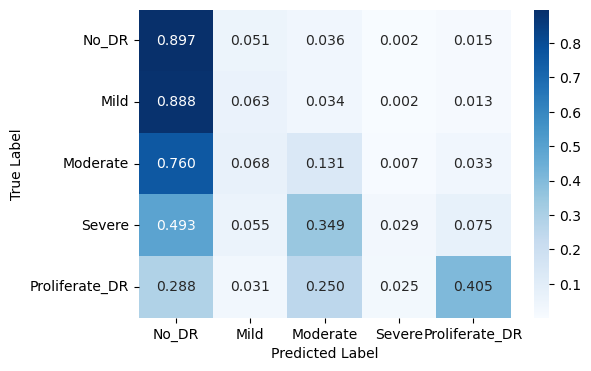

In [ ]:
confusion_matrix = calculate_confusion_matrix(model, extra_loader)
plot_confusion_matrix(confusion_matrix, data_class.values())

In [ ]:
model.validate(val_loader)

{'accuracy': 0.7923497267759563, 'loss': 0.7783147096633911}